In [2]:
# 1. Data Normalization

# import processing from sklearn
from sklearn import preprocessing

# Create an array using numpy
import numpy as np
x_array = np.array([2,3,5,6,7,4,8,7,6])

# Normalize the data using the normalize() method
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.11785113 0.1767767  0.29462783 0.35355339 0.41247896 0.23570226
  0.47140452 0.41247896 0.35355339]]


In [3]:
# 2. Data Standardization

#import datasets via sklearn and preprocessing
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#load the data set
dataset = load_iris()
object= StandardScaler()
 
# Splitting the independent and dependent variables
i_data = dataset.data
response = dataset.target
 
# standardization 
scale = object.fit_transform(i_data) 
print(scale)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [4]:
# 3. Working with a Data frame 

# import dataset
import pandas as pd
df = pd.read_csv("calif_housing_data.csv")
df.head()

,housing_median_age,total_bedrooms,households,median_income,median_house_value
0,41,129.0,126,8.3252,452600.0
1,21,1106.0,1138,8.3014,358500.0
2,52,190.0,177,7.2574,352100.0
3,52,235.0,219,5.6431,341300.0
4,52,280.0,259,3.8462,342200.0


In [5]:
## (a) how many rows does the dataset have?

print("The number of rows the dataset has is", len(df.index))

The number of rows the dataset has is 20640


The target vector for my model is median_house_value


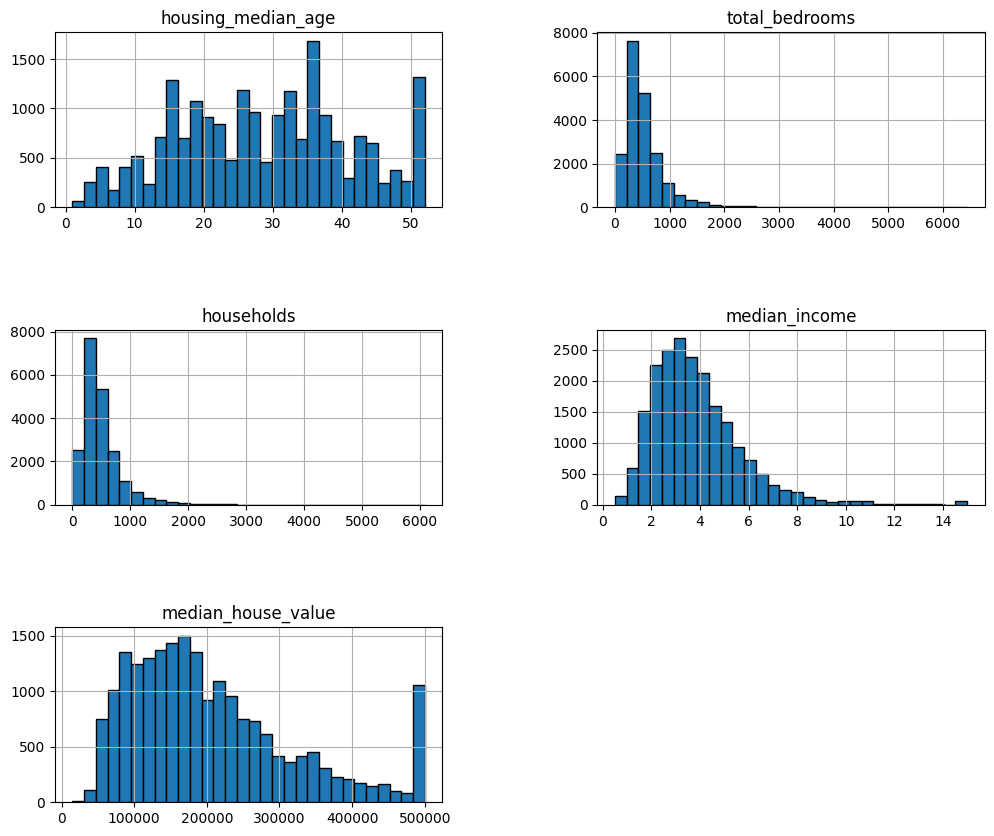

In [6]:
## (b) what is the target vector for your model?

df.median_house_value.mode()

import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

print("The target vector for my model is median_house_value")

In [7]:
## (c) Create a new feature by taking the total number of bedrooms divided by the number of households. What does this new feature represent?

df["new_feature"] = df['total_bedrooms'] / df['households']

df.head()



,housing_median_age,total_bedrooms,households,median_income,median_house_value,new_feature
0,41,129.0,126,8.3252,452600.0,1.023810
1,21,1106.0,1138,8.3014,358500.0,0.971880
2,52,190.0,177,7.2574,352100.0,1.073446
3,52,235.0,219,5.6431,341300.0,1.073059
4,52,280.0,259,3.8462,342200.0,1.081081


In [1]:
print("This new feature represents the correlation between the total number of bedrooms per households. Seeing that the totals are close to one and zero, the two datasets correlate well with one another and are much similar of the datasets.")

This new feature represents the correlation between the total number of bedrooms per households. Seeing that the totals are close to one and zero, the two datasets correlate well with one another and are much similar of the datasets.


In [8]:
## (d) Now, create a new data frame that has three features: the median age, median income, and the new feature created in part (c).

new_df = df[['housing_median_age','median_income','new_feature']].copy()
new_df



,housing_median_age,median_income,new_feature
0,41,8.3252,1.023810
1,21,8.3014,0.971880
2,52,7.2574,1.073446
3,52,5.6431,1.073059
4,52,3.8462,1.081081
...,...,...,...
20635,25,1.5603,1.133333
20636,18,2.5568,1.315789
20637,17,1.7000,1.120092
20638,18,1.8672,1.171920


In [9]:
## (e) Take the data frame created in part (d) and apply data standardization to the features.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(new_df)

print(standardized_data)

standardized_new_df = pd.DataFrame(standardized_data, columns=new_df.columns)

print(standardized_new_df)

[[ 0.98214266  2.34476576 -0.15386269]
 [-0.60701891  2.33223796 -0.26293612]
 [ 1.85618152  1.7826994  -0.04960394]
 ...
 [-0.92485123 -1.14259331  0.04837295]
 [-0.84539315 -1.05458292  0.15723288]
 [-1.00430931 -0.78012947  0.13695191]]
       housing_median_age  median_income  new_feature
0                0.982143       2.344766    -0.153863
1               -0.607019       2.332238    -0.262936
2                1.856182       1.782699    -0.049604
3                1.856182       0.932968    -0.050417
4                1.856182      -0.012881    -0.033568
...                   ...            ...          ...
20635           -0.289187      -1.216128     0.076185
20636           -0.845393      -0.691593     0.459421
20637           -0.924851      -1.142593     0.048373
20638           -0.845393      -1.054583     0.157233
20639           -1.004309      -0.780129     0.136952

[20640 rows x 3 columns]
